In [1]:
import yfinance as yf
import pandas_datareader as pdr
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt

In [6]:
# import SPY stock price
df_spy = pdr.get_data_yahoo("SPY", start="2019-01-01", end="2019-09-30")
# import AAPL stock price
df_aapl = pdr.get_data_yahoo("AAPL", start="2019-01-01", end="2019-09-30")

In [4]:
df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,251.210007,245.949997,245.979996,250.179993,126925200.0,243.025879
2019-01-03,248.570007,243.669998,248.229996,244.210007,144140700.0,237.226593
2019-01-04,253.110001,247.169998,247.589996,252.389999,142628800.0,245.172668
2019-01-07,255.949997,251.690002,252.690002,254.380005,103139100.0,247.105774
2019-01-08,257.309998,254.000000,256.820007,256.769989,102512600.0,249.427399


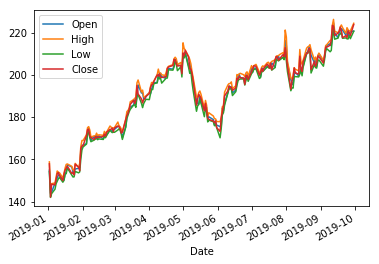

In [8]:
df_aapl[["Open", "High", "Low", "Close"]].plot()
plt.show()

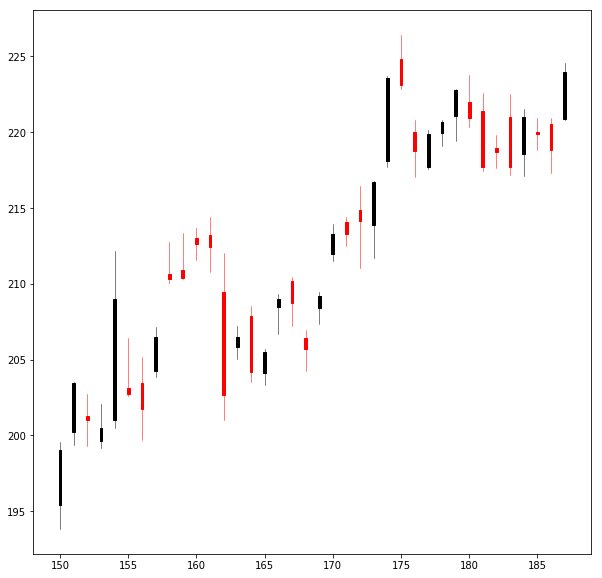

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()

plot_data = []
for i in range(150, len(df_aapl)):
    row = [
        i, 
        df_aapl.Open.iloc[i], 
        df_aapl.High.iloc[i], 
        df_aapl.Low.iloc[i], 
        df_aapl.Close.iloc[i], 
    ]
    plot_data.append(row)
candlestick_ohlc(ax, plot_data)
plt.show()

In [10]:
from stockstats import StockDataFrame
stocks = StockDataFrame.retype(df_aapl[["Open", "Close", "High", "Low", "Volume"]])

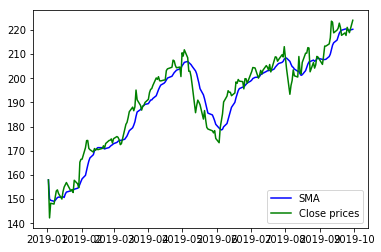

In [11]:
plt.plot(stocks["close_10_sma"], color="b", label="SMA")
plt.plot(df_aapl.Close, color="g", label="Close prices")
plt.legend(loc="lower right")
plt.show()

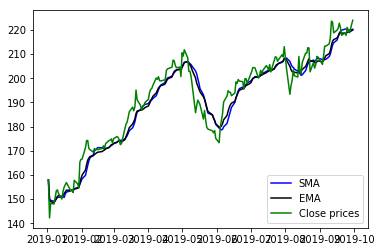

In [12]:
plt.plot(stocks["close_10_sma"], color="b", label="SMA") # plotting SMA
plt.plot(stocks["close_10_ema"], color="k", label="EMA")
plt.plot(df_aapl.Close, color="g", label="Close prices") # plotting close prices
plt.legend(loc="lower right")
plt.show()

NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


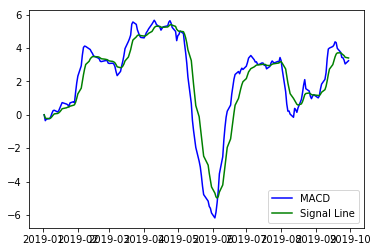

In [13]:
plt.plot(stocks["macd"], color="b", label="MACD")
plt.plot(stocks["macds"], color="g", label="Signal Line")
plt.legend(loc="lower right")
plt.show()